<a href="https://colab.research.google.com/github/presentchris/Computer-Vision/blob/main/Practice_of_Stats%26Modelings8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##이미지 전처리와 분류
주어진 이미지 데이터셋에 대해 이미지 전처리 과정을 수행하고, 간단한 CNN(Convolutional Neural Network)을 사용하여 이미지를 분류하기.
이미지 전처리 과정에는 OpenCV를 사용하여 이미지를 Grayscale로 변환하고, 이미지의 크기를 조정(resize)하기.

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# 이미지를 Grayscale로 변환하고 크기를 조정하는 함수
def preprecess_image(image_path):
  image = cv2.imread(image_path)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resized_image = cv2.resize(gray_image, (28,28))
  return resized_image

In [ ]:
# 가상의 데이터셋 준비
def generate_fake_data(num_samples):
  # 28x28 크기의 가상 이미지 데이터 생성
  images = np.random.rand(num_samples, 28, 28, 1)
  # 10개의 클래스에 대한 가상 레이블 생성
  labels = np.random.randint(0, 10, num_samples)
  return images, labels

In [ ]:
# 가상의 데이터셋 생성
num_samples = 1000
images, labels = generate_fake_data(num_samples)

In [ ]:
# 레이블을 원-핫 인코딩 형태로 변환
labels = to_categorical(labels, 10)

In [ ]:
# 데이터셋을 학습 세트와 검증 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# 간단한 CNN 모델 구성
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, epochs = 3, validation_data = (X_test, y_test), batch_size=32)

Epoch 1/3


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


In [ ]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
# 모델 성능 시각화(선택적)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.show()

##단순 회귀 분석
임의로 생성된 데이터셋을 사용하여 단순 선형 회귀 모델을 구현하기.
데이터셋은 NumPy를 사용하여 생성하며, 생성된 데이터에 대한 회귀선을 찾고, 이를 시각화하기.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# 임의의 데이터셋 생성
np.random.seed(0)
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.randn(100,1)

In [ ]:
# 단순 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

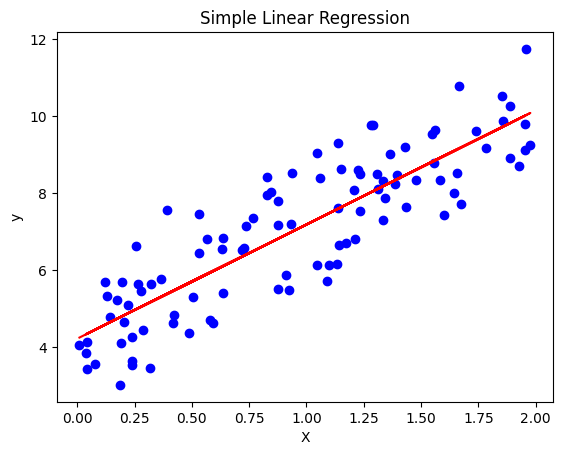

In [ ]:
# 회귀선 시각화
plt.scatter(X, y, color = 'blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.show()

##이미지에서의 객체 검출
OpenCV를 활용하여 주어진 이미지 내에서 객체의 윤곽(contours)을 찾고, 찾은 윤곽에 바운딩 박스(bounding box)를 그리기.
이미지는 선택할 수 있으며, 목표는 객체의 위치를 정확히 식별하는 것.

In [ ]:
import cv2

In [ ]:
# 이미지 로드 및 Grayscale 변환
image = cv2.imread('image_path.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Threshold 적용
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

In [ ]:
# 윤곽 찾기
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# 윤곽에 바운딩 박스 그리기
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)

In [ ]:
cv2.imshow('Detected Objects', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

##시계열 데이터를 이용한 에너지 소비량 예측
문제 설명: 여러분은 특정 지역의 전력 소비량 데이터를 가지고 있습니다. 이 데이터는 시간별 전력 소비량을 나타냅니다. 여러분의 목표는 과거 데이터를 기반으로 미래 24시간 동안의 전력 소비량을 예측하는 모델을 개발하는 것입니다.


데이터셋 설명:
데이터셋은 'timestamp'와 'power_consumption'의 두 컬럼을 가집니다.
'timestamp' 컬럼은 각 기록의 시간을 나타내며, 'power_consumption'은 해당 시간의 전력 소비량(단위: kW)입니다.
데이터는 1시간 간격으로 기록되어 있습니다.


주요 단계:
1. 데이터 전처리: 시간적 특성을 모델이 이해할 수 있도록 적절한 형태로 변환합니다. 필요한 경우, 결측치를 처리하고, 데이터를 정규화합니다.

2. 특성 공학: 과거의 전력 소비량 데이터를 사용하여, 모델의 입력으로 사용될 특성 세트를 생성합니다. 예를 들어, 과거 24시간의 소비량을 입력으로 사용할 수 있습니다.

3. 모델 구축: 시계열 예측에 적합한 모델을 선택하여 구축합니다. 여기서는 LSTM 모델을 사용할 수 있습니다.

4. 모델 학습과 검증: 준비된 데이터셋을 훈련 데이터와 검증 데이터로 분할하고, 모델을 학습시킨 후 검증 데이터셋을 이용하여 모델의 성능을 평가합니다.
5. 미래 예측 수행 및 평가: 학습된 모델을 사용하여 미래 24시간 동안의 전력 소비량을 예측하고, 실제 소비량(가능한 경우)과 비교하여 모델의 성능을 평가합니다.


데이터 예시:

timestamp : 2021-01-01 00:00            4


power_consumption : 2300


//


timestamp : 2021-01-01 01:00


power_consumption : 2100

...

In [ ]:
# 데이터 전처리

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 임의의 시계열 데이터 생성
np.random.seed(0)
timestamps = pd.date_range('20210101', periods = 1000, freq='H')
power_consumption = np.sin(np.linspace(0, 50, 1000)) + np.random.normal(0, 0.1, 1000)

data = pd.DataFrame(data={'timestamp': timestamps, 'power_consumption': power_consumption})

In [ ]:
# 특성 공학_과거의 전력 소비량 데이터를 기반으로 미래 전력 소비량을 예측하기 위한 특성 세트를 생성

look_back = 24
X, y = [], []
for i in range(look_back, len(power_consumption)):
  X.append(power_consumption[i-look_back:i])
  y.append(power_consumption[i])
X, y = np.array(X), np.array(y)

# 데이터 정규화
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)
y = scaler.transform(y.reshape(-1, 1))

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

ValueError: X has 1 features, but MinMaxScaler is expecting 24 features as input.

In [ ]:
# 모델 구축_LSTM 모델 구축

model = Sequential([
    LSTM(50, input_shape = (X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
# 모델 학습 및 검증

# 차원 확장
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test), batch_size=32, verbose=2)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: (32, 28, 28, 1, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 28, 28, 1, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
# 성능 평가 및 예측

# 손실 그래프
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 예측
y_pred = model.predict(X_test)
# 예측값 역정규화
y_pred = scaler.inverse_transform(y_pred)